# import package

In [ ]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import seaborn as sns

In [ ]:
import datetime

# importing DATA SET

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/company dataset/MAL_EmpLateAttendance.xlsx')
df

,LateinMin_ID,SNo,Empid,EmpNo,PunchDate,ShiftIn,ShiftOut,Gracemin,Bank Hour,Intime,WGT,Late Minutes,Description,MinDED,ISApproved,Bactive,CreatedDate,CreatedBy,Outtime,Early Out,BreakIn,BreakOut
0,71,1,95,60002.0,2020-06-01,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,2020-07-21,NaN,21:00:00,0,NaN,NaN
1,72,2,95,60002.0,2020-06-02,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,2020-07-21,NaN,21:00:00,0,NaN,NaN
2,73,3,95,60002.0,2020-06-03,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,2020-07-21,NaN,21:00:00,0,NaN,NaN
3,74,4,95,60002.0,2020-06-04,09:00:00,21:00:00,00:30:00,0.0,09:00:00,0,15.0,LATE,30.0,0,1,2020-07-21,NaN,09:15:00,0,NaN,NaN
4,75,5,95,60002.0,2020-06-04,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,2020-07-21,NaN,21:00:00,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66685,1070125,954,217,50005.0,2021-09-03,09:45:00,20:45:00,00:00:00,0.0,15:31:00,0,314.0,LATE,330.0,0,1,2021-10-01,NaN,20:45:00,0,NaN,NaN
66686,1070126,993,218,50006.0,2021-09-29,09:45:00,21:30:00,00:00:00,0.0,15:33:00,0,357.0,LATE,360.0,0,1,2021-10-01,NaN,21:30:00,0,NaN,NaN
66687,1070127,1012,248,50035.0,2021-09-03,09:45:00,20:45:00,00:00:00,0.0,15:31:00,0,314.0,LATE,330.0,0,1,2021-10-01,NaN,20:45:00,0,NaN,NaN
66688,1070128,1016,248,50035.0,2021-09-07,09:45:00,20:45:00,00:00:00,0.0,15:06:00,0,339.0,LATE,360.0,0,1,2021-10-01,NaN,20:45:00,0,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.describe()

,LateinMin_ID,SNo,Empid,EmpNo,Bank Hour,WGT,Late Minutes,MinDED,ISApproved,Bactive,CreatedBy,Early Out,BreakIn,BreakOut
count,6.669000e+04,66690.000000,66690.000000,66155.000000,66155.000000,66690.0,58102.000000,58102.000000,66690.000000,66690.000000,38948.000000,66690.0,0.0,0.0
mean,6.172494e+05,1645.649348,303.118534,36824.569314,19.328713,0.0,40.158859,58.853740,0.584016,0.415984,342.887722,0.0,NaN,NaN
std,3.452072e+05,1768.844472,206.632366,22219.189362,263.809964,0.0,102.872090,101.089575,0.492895,0.492895,114.386135,0.0,NaN,NaN
min,7.100000e+01,1.000000,3.000000,201.000000,0.000000,0.0,-59.000000,-30.000000,0.000000,0.000000,1.000000,0.0,NaN,NaN
25%,3.842692e+05,248.000000,139.000000,20040.000000,0.000000,0.0,4.000000,30.000000,0.000000,0.000000,309.000000,0.0,NaN,NaN
50%,7.622405e+05,906.000000,287.000000,40018.000000,0.000000,0.0,11.000000,30.000000,1.000000,0.000000,309.000000,0.0,NaN,NaN
75%,8.805258e+05,2633.000000,396.000000,60014.000000,0.000000,0.0,28.000000,30.000000,1.000000,1.000000,309.000000,0.0,NaN,NaN
max,1.070370e+06,7409.000000,1029.000000,80093.000000,7877.000000,0.0,795.000000,810.000000,1.000000,1.000000,654.000000,0.0,NaN,NaN


# checking DATATYPE

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66690 entries, 0 to 66689
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   LateinMin_ID  66690 non-null  int64         
 1   SNo           66690 non-null  int64         
 2   Empid         66690 non-null  int64         
 3   EmpNo         66155 non-null  float64       
 4   PunchDate     66690 non-null  datetime64[ns]
 5   ShiftIn       66690 non-null  object        
 6   ShiftOut      66690 non-null  object        
 7   Gracemin      57386 non-null  object        
 8   Bank Hour     66155 non-null  float64       
 9   Intime        66690 non-null  object        
 10  WGT           66690 non-null  int64         
 11  Late Minutes  58102 non-null  float64       
 12  Description   66690 non-null  object        
 13  MinDED        58102 non-null  float64       
 14  ISApproved    66690 non-null  int64         
 15  Bactive       66690 non-null  int64 

In [ ]:
df['EmpNo'].nunique()

918

In [ ]:
df['Bank Hour'].count()

66155

In [ ]:
df['Bank Hour'].fillna(value=0,inplace=True)
df['Gracemin'].fillna(value=0,inplace=True)

In [ ]:
df.drop(['BreakIn','BreakOut','Early Out','CreatedDate','EmpNo','CreatedBy'],axis=1,inplace=True)

In [ ]:
df


,LateinMin_ID,SNo,Empid,PunchDate,ShiftIn,ShiftOut,Gracemin,Bank Hour,Intime,WGT,Late Minutes,Description,MinDED,ISApproved,Bactive,Outtime
0,71,1,95,2020-06-01,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,21:00:00
1,72,2,95,2020-06-02,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,21:00:00
2,73,3,95,2020-06-03,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,21:00:00
3,74,4,95,2020-06-04,09:00:00,21:00:00,00:30:00,0.0,09:00:00,0,15.0,LATE,30.0,0,1,09:15:00
4,75,5,95,2020-06-04,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66685,1070125,954,217,2021-09-03,09:45:00,20:45:00,00:00:00,0.0,15:31:00,0,314.0,LATE,330.0,0,1,20:45:00
66686,1070126,993,218,2021-09-29,09:45:00,21:30:00,00:00:00,0.0,15:33:00,0,357.0,LATE,360.0,0,1,21:30:00
66687,1070127,1012,248,2021-09-03,09:45:00,20:45:00,00:00:00,0.0,15:31:00,0,314.0,LATE,330.0,0,1,20:45:00
66688,1070128,1016,248,2021-09-07,09:45:00,20:45:00,00:00:00,0.0,15:06:00,0,339.0,LATE,360.0,0,1,20:45:00


In [ ]:
df['Empid'].nunique()

912

In [ ]:
df['Late Minutes'].mean()

40.15885855908574

In [ ]:
df['Late Minutes'].fillna(value=40,inplace=True)
df['MinDED'].fillna(value=60,inplace=True)

In [ ]:
df.isnull().sum()

LateinMin_ID    0
SNo             0
Empid           0
PunchDate       0
ShiftIn         0
ShiftOut        0
Gracemin        0
Bank Hour       0
Intime          0
WGT             0
Late Minutes    0
Description     0
MinDED          0
ISApproved      0
Bactive         0
Outtime         0
dtype: int64

In [ ]:
k=df

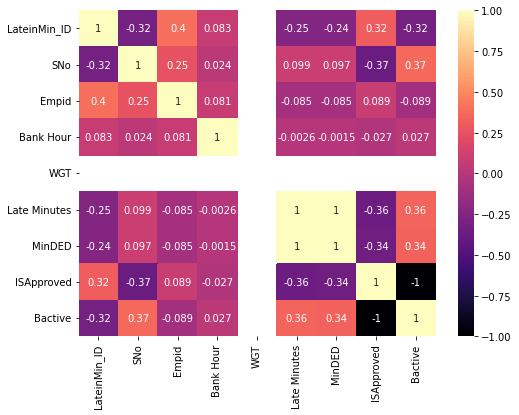

In [ ]:
carrh=k.corr()
plt.figure(figsize=(8,6))
sns.heatmap(carrh, cmap="magma", annot=True)

In [ ]:
h1=k.groupby(['Empid'],as_index=False)['Late Minutes'].count()

In [ ]:
h1.rename(columns={'Late Minutes': 'Total no of days late'}, inplace=True)

In [ ]:
h2=h1.sort_values(by=['Total no of days late'],ascending=False)
p=h2.head()
p

,Empid,Total no of days late
262,294,458
271,303,388
253,285,386
260,292,380
294,327,373


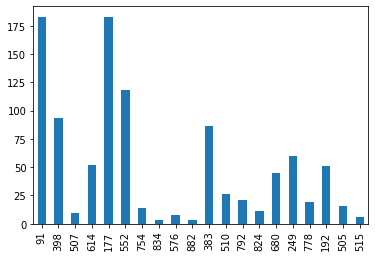

In [ ]:
h2["Total no of days late"].sample(20).plot(kind="bar")

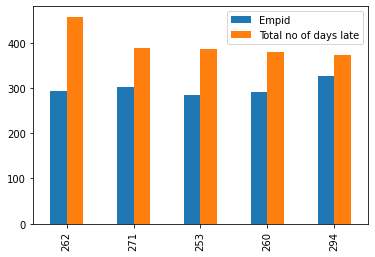

In [ ]:
p.plot(kind='bar')

In [ ]:
h3=k.groupby(['Empid'],as_index=False)['Late Minutes'].sum()

In [ ]:
h3.head()

,Empid,Late Minutes
0,3,7939.0
1,4,10704.0
2,5,3538.0
3,6,10546.0
4,7,10588.0


In [ ]:
h4=h3.sort_values(by=['Late Minutes'],ascending=False)
h4.head()

,Empid,Late Minutes
422,459,26388.0
654,713,25212.0
262,294,17532.0
111,137,17490.0
9,12,17338.0


In [ ]:
h4.head()

,Empid,Late Minutes
422,459,26388.0
654,713,25212.0
262,294,17532.0
111,137,17490.0
9,12,17338.0


In [ ]:
h4.rename(columns={'Late Minutes':'Late_Min'}, inplace=True)

In [ ]:
h4["Late_Min"]=h4.Late_Min.astype(str)
h4["Late_Min"]=h4.Late_Min.astype(float)

In [ ]:
h4.dtypes

Empid         int64
Late_Min    float64
dtype: object

In [ ]:
h4["Late_Hrs"]=h4["Late_Min"]/60

In [ ]:
h4.head()

,Empid,Late_Min,Late_Hrs
422,459,26388.0,439.800000
654,713,25212.0,420.200000
262,294,17532.0,292.200000
111,137,17490.0,291.500000
9,12,17338.0,288.966667


In [ ]:
k["PunchDay"]=k["PunchDate"].dt.day_name()

In [ ]:
k["PunchMonth"]=k["PunchDate"].dt.month_name()

In [ ]:
k.groupby(["PunchDay"],as_index=False)['SNo'].count()

,PunchDay,SNo
0,Friday,10183
1,Monday,9744
2,Saturday,10129
3,Sunday,6244
4,Thursday,10652
5,Tuesday,9677
6,Wednesday,10061


In [ ]:
h5=k.groupby(["PunchMonth"],as_index=False)['SNo'].count()
h5

,PunchMonth,SNo
0,April,5705
1,August,8178
2,December,4816
3,February,2655
4,January,4579
5,July,11793
6,June,1530
7,March,3707
8,November,5356
9,October,7566


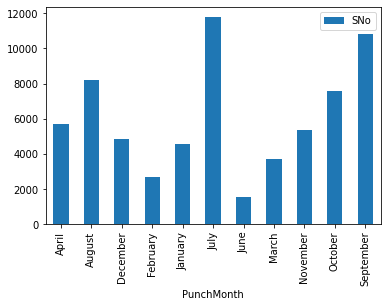

In [ ]:
h5.plot(kind="bar",x='PunchMonth',y='SNo')

In [ ]:
k.groupby(["PunchMonth","PunchDay","PunchDate"],as_index=False)['SNo'].count()

,PunchMonth,PunchDay,PunchDate,SNo
0,April,Friday,2021-04-02,121
1,April,Friday,2021-04-09,113
2,April,Friday,2021-04-16,132
3,April,Friday,2021-04-23,402
4,April,Monday,2021-04-05,128
...,...,...,...,...
413,September,Wednesday,2021-09-01,182
414,September,Wednesday,2021-09-08,90
415,September,Wednesday,2021-09-15,116
416,September,Wednesday,2021-09-22,161


In [ ]:
df

,LateinMin_ID,SNo,Empid,PunchDate,ShiftIn,ShiftOut,Gracemin,Bank Hour,Intime,WGT,Late Minutes,Description,MinDED,ISApproved,Bactive,Outtime,PunchDay,PunchMonth
0,71,1,95,2020-06-01,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,21:00:00,Monday,June
1,72,2,95,2020-06-02,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,21:00:00,Tuesday,June
2,73,3,95,2020-06-03,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,21:00:00,Wednesday,June
3,74,4,95,2020-06-04,09:00:00,21:00:00,00:30:00,0.0,09:00:00,0,15.0,LATE,30.0,0,1,09:15:00,Thursday,June
4,75,5,95,2020-06-04,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,21:00:00,Thursday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66685,1070125,954,217,2021-09-03,09:45:00,20:45:00,00:00:00,0.0,15:31:00,0,314.0,LATE,330.0,0,1,20:45:00,Friday,September
66686,1070126,993,218,2021-09-29,09:45:00,21:30:00,00:00:00,0.0,15:33:00,0,357.0,LATE,360.0,0,1,21:30:00,Wednesday,September
66687,1070127,1012,248,2021-09-03,09:45:00,20:45:00,00:00:00,0.0,15:31:00,0,314.0,LATE,330.0,0,1,20:45:00,Friday,September
66688,1070128,1016,248,2021-09-07,09:45:00,20:45:00,00:00:00,0.0,15:06:00,0,339.0,LATE,360.0,0,1,20:45:00,Tuesday,September


In [ ]:
df["PunchDay"]=df["PunchDate"].dt.day_name()

In [ ]:
df["PunchMonth"]=df["PunchDate"].dt.month_name()

In [ ]:
Punch= {"PunchDay":     {"Monday": 1, "Tuesday": 2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7},
                "PunchMonth": {"January": 1, "February": 2, "March": 3, "April": 4,
                                  "June": 6, "July": 7, "August":8,"September":9, "October":10,
                               "November":11,"December":12}}
df.replace(Punch)

,LateinMin_ID,SNo,Empid,PunchDate,ShiftIn,ShiftOut,Gracemin,Bank Hour,Intime,WGT,Late Minutes,Description,MinDED,ISApproved,Bactive,Outtime,PunchDay,PunchMonth
0,71,1,95,2020-06-01,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,21:00:00,1,6
1,72,2,95,2020-06-02,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,21:00:00,2,6
2,73,3,95,2020-06-03,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,21:00:00,3,6
3,74,4,95,2020-06-04,09:00:00,21:00:00,00:30:00,0.0,09:00:00,0,15.0,LATE,30.0,0,1,09:15:00,4,6
4,75,5,95,2020-06-04,09:00:00,21:00:00,00:30:00,0.0,20:00:00,0,60.0,LATE,60.0,0,1,21:00:00,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66685,1070125,954,217,2021-09-03,09:45:00,20:45:00,00:00:00,0.0,15:31:00,0,314.0,LATE,330.0,0,1,20:45:00,5,9
66686,1070126,993,218,2021-09-29,09:45:00,21:30:00,00:00:00,0.0,15:33:00,0,357.0,LATE,360.0,0,1,21:30:00,3,9
66687,1070127,1012,248,2021-09-03,09:45:00,20:45:00,00:00:00,0.0,15:31:00,0,314.0,LATE,330.0,0,1,20:45:00,5,9
66688,1070128,1016,248,2021-09-07,09:45:00,20:45:00,00:00:00,0.0,15:06:00,0,339.0,LATE,360.0,0,1,20:45:00,2,9


In [ ]:
df['PunchYear']=df['PunchDate'].map(lambda x:x.year)
df['PunchMonth']=df['PunchDate'].map(lambda x:x.month)
df['PunchDay']=df['PunchDate'].map(lambda x:x.day)

In [ ]:
df['PunchDate']=pd.to_datetime(df.PunchDate,format='%Y-%m-%d')

In [ ]:
df.drop(['PunchDate','Intime','Outtime','Gracemin','ShiftOut','ShiftIn'  
       ,'Description','ISApproved'],
  axis='columns', inplace=True)

In [ ]:
k1=df

In [ ]:
k1

,LateinMin_ID,SNo,Empid,Bank Hour,WGT,Late Minutes,MinDED,Bactive,PunchDay,PunchMonth,PunchYear
0,71,1,95,0.0,0,60.0,60.0,1,1,6,2020
1,72,2,95,0.0,0,60.0,60.0,1,2,6,2020
2,73,3,95,0.0,0,60.0,60.0,1,3,6,2020
3,74,4,95,0.0,0,15.0,30.0,1,4,6,2020
4,75,5,95,0.0,0,60.0,60.0,1,4,6,2020
...,...,...,...,...,...,...,...,...,...,...,...
66685,1070125,954,217,0.0,0,314.0,330.0,1,3,9,2021
66686,1070126,993,218,0.0,0,357.0,360.0,1,29,9,2021
66687,1070127,1012,248,0.0,0,314.0,330.0,1,3,9,2021
66688,1070128,1016,248,0.0,0,339.0,360.0,1,7,9,2021


In [ ]:
#separate the other attributes from the predicting attribute
x =k1.drop('PunchMonth',axis=1) 
#separte the predicting attribute into Y for model training 
y = k1['PunchMonth']

In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 200)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
x_test

,LateinMin_ID,SNo,Empid,Bank Hour,WGT,Late Minutes,MinDED,Bactive,PunchDay,PunchYear
2532,14958,2762,174,0.0,0,60.0,60.0,1,7,2020
40298,796299,24,62,0.0,0,4.0,30.0,0,23,2021
58633,1007146,598,48,0.0,0,6.0,30.0,0,9,2021
1690,13451,1255,101,0.0,0,60.0,60.0,1,7,2020
51363,1012105,4753,605,0.0,0,49.0,60.0,1,11,2021
...,...,...,...,...,...,...,...,...,...,...
12551,378663,2829,193,0.0,0,9.0,30.0,0,25,2020
8163,382082,290,20,0.0,0,40.0,60.0,1,6,2020
8407,92291,354,262,0.0,0,24.0,30.0,1,25,2020
29790,765323,7,22,0.0,0,2.0,30.0,0,5,2020


In [ ]:
k1.sample()

,LateinMin_ID,SNo,Empid,Bank Hour,WGT,Late Minutes,MinDED,Bactive,PunchDay,PunchMonth,PunchYear
27209,732006,237,615,0.0,0,5.0,30.0,0,11,12,2020


In [ ]:
y_prediction =  LR.predict(x_test)
#y_prediction =  LR.predict([[994128	,777,	304	,0.0,	0,	2.0,	30.0,	0,	24,	2021]])
y_prediction

array([ 6.38864716,  3.11171369,  5.23845904, ...,  6.99259699,
       12.63820856,  4.76937955])

In [ ]:
###### importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 socre is",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is 0.8276007119058211
mean_sqrd_error is== 1.72939343613991
root_mean_squared error of is== 1.3150640426001732
